In [160]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib
import plotly.express as px

In [71]:
meta = pandas.read_csv("VDB_16S_metadata.txt", sep="\t").dropna()
meta

,SampleID,Gender,Floor,Building,Surface
0,EKCM2.489495,Male,C,Ekeley,Door out
1,EKBM8.489473,Male,B,Ekeley,Faucet handles
2,EKCF4.489498,Female,C,Ekeley,Stall out
3,PTBM9.489505,Male,B,Porter,Soap dispenser
4,EKBF10.489552,Female,B,Ekeley,Sink floor
...,...,...,...,...,...
104,B6.489449,None,C,Porter,Water
105,B5.489455,None,B,Porter,Water
106,B1.489537,None,A,Ekeley,Water
107,B3.489528,None,C,Ekeley,Water


In [215]:
dataset = pandas.read_csv("VDB_16S_dataset.txt", sep="\t").dropna()
dataset

,#OTU ID,EKCM2.489495,EKBM8.489473,EKCF4.489498,PTBM9.489505,EKBF10.489552,PTAM4.489517,EKCM1.489478,EKAM4.489564,EKCM7.489464,...,PTCF8.489486,EKCM9.489514,PTBF4.489483,PTBF1.489562,B6.489449,B5.489455,B1.489537,B3.489528,B2.489526,ConsensusLineage
0,469478,3.0,5.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Clostridia; o__...
1,208196,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
2,378462,0.0,0.0,0.0,0.0,0.0,2.0,2.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Firmicutes; c__Bacilli; o__Bac...
3,265971,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Actinobacteria; c__Actinobacte...
4,570812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,198655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,285.0,184.0,437.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
4463,203087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
4464,89363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,43.0,79.0,83.0,k__Bacteria; p__Proteobacteria; c__Alphaproteo...
4465,542202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,k__Bacteria; p__Cyanobacteria; c__mle1-12; o__...


In [264]:
phylo = {'#OTU ID':[], 'king':[], 'phyl':[], 'class':[], 'order':[], 'fam':[],'genus':[], 'species':[]}

for index, row in dataset.iterrows():
    phylo['#OTU ID'].append(row['#OTU ID'])
    cons = row["ConsensusLineage"]
    ph = cons.split("; ")
    for ranks in ph:
        r = ranks.split('__')
        if r[0] == 'k':
            phylo['king'].append(r[1])
        elif r[0] == 'p':
            phylo['phyl'].append(r[1])
        elif r[0] == 'c':
            phylo['class'].append(r[1])
        elif r[0] == 'o':
            phylo['order'].append(r[1])
        elif r[0] == 'f':
            phylo['fam'].append(r[1])
        elif r[0] == 'g':
            phylo['genus'].append(r[1])  
        elif r[0] == 's':
            phylo['species'].append(r[1])                      

dt_phylo = pandas.DataFrame(data=phylo)

In [265]:
dt_phylo = dt_phylo.replace(r'^\s*$', "None", regex=True)
dt_phylo

,#OTU ID,king,phyl,class,order,fam,genus,species
0,469478,Bacteria,Firmicutes,Clostridia,Clostridiales,Lachnospiraceae,Catonella,None
1,208196,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Methylobacteriaceae,Methylobacterium,Methylobacterium organophilum
2,378462,Bacteria,Firmicutes,Bacilli,Bacillales,Staphylococcaceae,Staphylococcus,None
3,265971,Bacteria,Actinobacteria,Actinobacteria (class),Actinomycetales,Pseudonocardiaceae,None,None
4,570812,Bacteria,Proteobacteria,Alphaproteobacteria,Rhodospirillales,Rhodospirillaceae,None,None
...,...,...,...,...,...,...,...,...
4462,198655,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Bradyrhizobiaceae,None,None
4463,203087,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,None,None
4464,89363,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Hyphomicrobiaceae,Hyphomicrobium,None
4465,542202,Bacteria,Cyanobacteria,mle1-12,None,None,None,None


In [165]:
list_phylo = []

for item, column in dt_phylo.items():
    if item != "#OTU ID":
        list_phylo.append(dt_phylo[item].unique().tolist())

In [225]:
prov = dataset[dataset.columns[1:-1]].sum(axis=1)
prov

332917.0

In [266]:
dt_treemap = dt_phylo.assign(abund = prov)
# dt_treemap.drop(['ConsensusLineage'], axis=1)
dt_treemap.loc[dt_treemap['order'] == 'Nostocales']
# path_tree = dt_treemap.columns.tolist().pop(0)
# path_tree

,#OTU ID,king,phyl,class,order,fam,genus,species,abund
66,198952,Bacteria,Cyanobacteria,None,Nostocales,Nostocaceae,None,None,1.0
227,108003,Bacteria,Cyanobacteria,None,Nostocales,Nostocaceae,Nostoc,None,1.0
260,50096,Bacteria,Cyanobacteria,None,Nostocales,Nostocaceae,None,None,5.0
989,111492,Bacteria,Cyanobacteria,None,Nostocales,Nostocaceae,None,None,18.0
1663,546107,Bacteria,Cyanobacteria,None,Nostocales,Nostocaceae,Nostoc,None,6.0
1795,111394,Bacteria,Cyanobacteria,None,Nostocales,Nostocaceae,None,None,1.0
1991,101942,Bacteria,Cyanobacteria,None,Nostocales,Nostocaceae,Anabaena,None,2.0
2020,200652,Bacteria,Cyanobacteria,None,Nostocales,Rivulariaceae,Calothrix,None,2.0
3425,267299,Bacteria,Cyanobacteria,None,Nostocales,Nostocaceae,None,None,2.0
3432,3098,Bacteria,Cyanobacteria,None,Nostocales,Nostocaceae,Anabaena,Anabaena cylindrica,6.0


In [274]:
fig = px.treemap(dt_treemap,
  path = ['king', 'phyl', 'class', 'order', 'fam', 'genus', 'species'],
  values = 'abund',
  color = 'abund',
  width = 1500,
  height = 1000
)

fig.show()

In [275]:
fig = px.sunburst(dt_treemap, 
path = ['king', 'phyl', 'class', 'order', 'fam', 'genus', 'species'],
values = 'abund',
color = 'abund',
width = 1500,
height = 1000)

fig.show()

## Abondance des embranchements (phylum) sur chaque surface

In [75]:
# phylum = []
# for index, row in dataset.iterrows():
#     cons = row["ConsensusLineage"]
#     p = cons.split(";")[1].split("__")[1]
#     phylum.append(p)
    
# dataset["Phylum"] = phylum

In [76]:
dataset.dtypes

#OTU ID               int64
EKCM2.489495        float64
EKBM8.489473        float64
EKCF4.489498        float64
PTBM9.489505        float64
                     ...   
B5.489455           float64
B1.489537           float64
B3.489528           float64
B2.489526           float64
ConsensusLineage     object
Length: 111, dtype: object

In [77]:
#dataset["Phylum"][0]

In [78]:
dict_surf = {}
for item, column in dataset.items():
    if (item != "#OTU ID") and (item != "ConsensusLineage"):
        surf = meta.loc[meta["SampleID"] == item]["Surface"].values[0]
        
        if surf not in dict_surf:
            dict_surf[surf] = {}
            
        # for index in column.index:
        #     phyl = dataset["Phylum"][index]
        #     if phyl not in dict_surf[surf]:
        #         dict_surf[surf][phyl] = column[index]
        #     else:
        #         dict_surf[surf][phyl] += column[index]

        for index in column.index:
            phylo = dt_phylo["class"][index]
            if phylo not in dict_surf[surf]:
                dict_surf[surf][phylo] = column[index]
            else:
                dict_surf[surf][phylo] += column[index]


### Abondance par genre de prélèvement de surfaces

In [112]:
dict_gender = {}
for item, column in dataset.items():
    if (item != "#OTU ID") and (item != "ConsensusLineage"):
        surf = meta.loc[meta["SampleID"] == item]["Surface"].values[0]
        gender = meta.loc[meta["SampleID"] == item]["Gender"].values[0]
        
        if surf not in dict_gender:
            dict_gender[surf] = {'Male': 0, 'Female': 0, 'None': 0}

        dict_gender[surf][gender] += dataset[item].sum()


[Text(0, 0, 'Door out'),
 Text(1, 0, 'Faucet handles'),
 Text(2, 0, 'Stall out'),
 Text(3, 0, 'Soap dispenser'),
 Text(4, 0, 'Sink floor'),
 Text(5, 0, 'Door in'),
 Text(6, 0, 'Toilet Floor'),
 Text(7, 0, 'Stall in'),
 Text(8, 0, 'Toilet flush handle'),
 Text(9, 0, 'Toilet seat'),
 Text(10, 0, 'Water')]

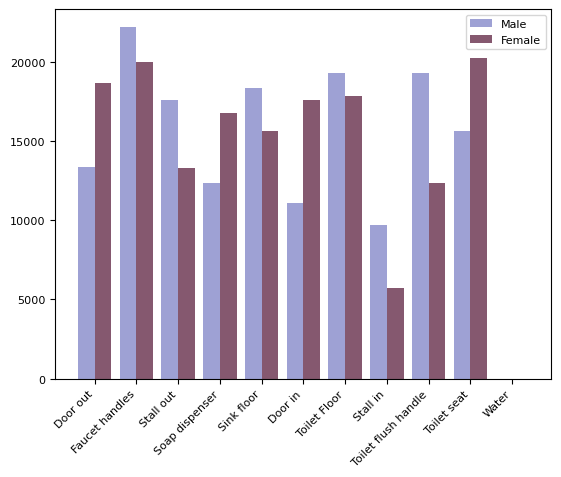

In [143]:
labels_surf = list(dict_gender.keys())
male = [dict_gender[surf]['Male'] for surf in dict_gender]
female = [dict_gender[surf]['Female'] for surf in dict_gender]

X = np.arange(len(labels_surf))

fig, ax = plt.subplots()

ax.bar(X - 0.2, male, width=0.4, color='#9EA1D4', label = 'Male')
ax.bar(X + 0.2, female, width=0.4, color='#85586F', label = 'Female')

ax.legend()

ax.set_xticks(X, labels_surf)
ax.set_xticklabels(labels_surf, rotation=45, ha='right')


In [79]:
dict_abund = {}
for place in dict_surf:
    dict_abund[place] = sum(dict_surf[place].values())

dict_abund

{'Door out': 32072.0,
 'Faucet handles': 42252.0,
 'Stall out': 30942.0,
 'Soap dispenser': 29167.0,
 'Sink floor': 34007.0,
 'Door in': 28666.0,
 'Toilet Floor': 37188.0,
 'Stall in': 15410.0,
 'Toilet flush handle': 31662.0,
 'Toilet seat': 35882.0,
 'Water': 15669.0}

In [114]:
labels_surf = list(dict_surf.keys())
labels_surf

11

In [81]:
dict_phyl = {}

for surface in dict_surf.values():
    # print(surface)
    for phyl in surface:
        if phyl in dict_phyl:
            dict_phyl[phyl].append(surface[phyl])
        else:
            dict_phyl[phyl] = [surface[phyl]]

dict_phyl

{'Clostridia': [1674.0,
  1110.0,
  875.0,
  1740.0,
  941.0,
  827.0,
  2684.0,
  1138.0,
  5875.0,
  12097.0,
  13.0],
 'Alphaproteobacteria': [1785.0,
  6195.0,
  1623.0,
  3127.0,
  5577.0,
  1496.0,
  5429.0,
  2293.0,
  3817.0,
  1859.0,
  11304.0],
 'Bacilli': [8399.0,
  4764.0,
  6414.0,
  5568.0,
  1335.0,
  4785.0,
  1606.0,
  2087.0,
  3755.0,
  4790.0,
  191.0],
 'Actinobacteria (class)': [12103.0,
  18339.0,
  14933.0,
  10811.0,
  11636.0,
  14345.0,
  11591.0,
  5170.0,
  9685.0,
  8909.0,
  1143.0],
 'Deltaproteobacteria': [230.0,
  146.0,
  141.0,
  392.0,
  86.0,
  247.0,
  109.0,
  229.0,
  128.0,
  133.0,
  12.0],
 'Sphingobacteria': [208.0,
  113.0,
  69.0,
  132.0,
  711.0,
  253.0,
  672.0,
  219.0,
  387.0,
  90.0,
  15.0],
 'Gammaproteobacteria': [2536.0,
  7626.0,
  2166.0,
  2532.0,
  6513.0,
  2331.0,
  7070.0,
  1532.0,
  2008.0,
  2010.0,
  162.0],
 'Flavobacteria': [274.0,
  180.0,
  120.0,
  140.0,
  987.0,
  200.0,
  705.0,
  81.0,
  325.0,
  98.0,
  28

[Text(0.0, 0, 'Door out'),
 Text(1.0, 0, 'Faucet handles'),
 Text(2.0, 0, 'Stall out'),
 Text(3.0, 0, 'Soap dispenser'),
 Text(4.0, 0, 'Sink floor'),
 Text(5.0, 0, 'Door in'),
 Text(6.0, 0, 'Toilet Floor'),
 Text(7.0, 0, 'Stall in'),
 Text(8.0, 0, 'Toilet flush handle'),
 Text(9.0, 0, 'Toilet seat'),
 Text(10.0, 0, 'Water')]

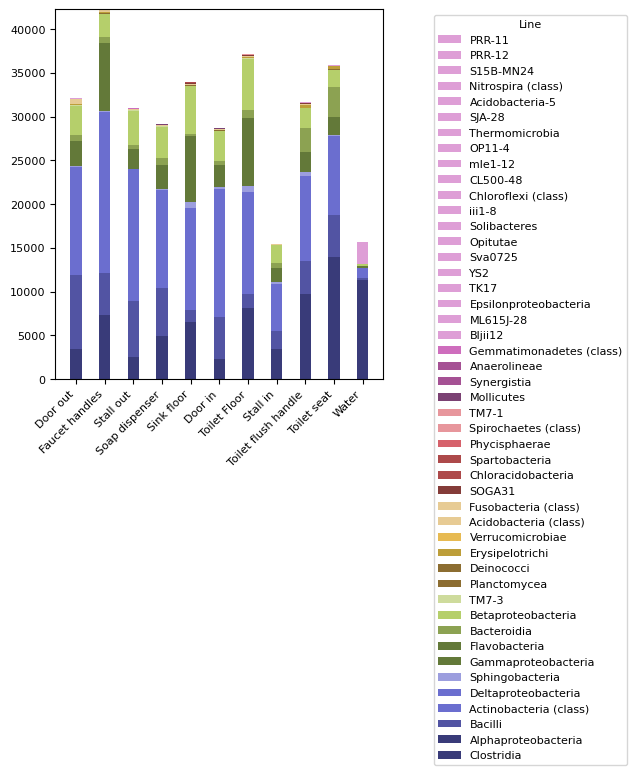

In [82]:
bottom = np.array([0.0 for i in range(11)])
cmap = matplotlib.cm.get_cmap('tab20b')
cnt = 0

# fig, ax = plt.subplots()
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios":[4, 1.5]})

for phyl in dict_phyl:
    ax.bar(labels_surf, dict_phyl[phyl], width=0.4, bottom=bottom, label=phyl, color=cmap(cnt))
    bottom += np.array(dict_phyl[phyl])
    cnt += 1/29

# ax.legend(list(dict_phyl.keys()))
handles, labels = ax.get_legend_handles_labels()
lax.legend(handles[::-1], labels[::-1], title='Line', loc='upper left')
lax.axis("off")

ax.set_xticks(labels_surf)
ax.set_xticklabels(labels_surf, rotation=45, ha='right')
# ax.tick_params(axis="x", labelrotation=45)

In [83]:
dict_phyl_high = {}
dict_phyl_low = {}

for phyl in dict_phyl:
    low = True
    for val in dict_phyl[phyl]:
        if val > 100:
            low = False
    if low:
        dict_phyl_low[phyl] = dict_phyl[phyl]
    else:
        dict_phyl_high[phyl] = dict_phyl[phyl]

[Text(0.0, 0, 'Door out'),
 Text(1.0, 0, 'Faucet handles'),
 Text(2.0, 0, 'Stall out'),
 Text(3.0, 0, 'Soap dispenser'),
 Text(4.0, 0, 'Sink floor'),
 Text(5.0, 0, 'Door in'),
 Text(6.0, 0, 'Toilet Floor'),
 Text(7.0, 0, 'Stall in'),
 Text(8.0, 0, 'Toilet flush handle'),
 Text(9.0, 0, 'Toilet seat'),
 Text(10.0, 0, 'Water')]

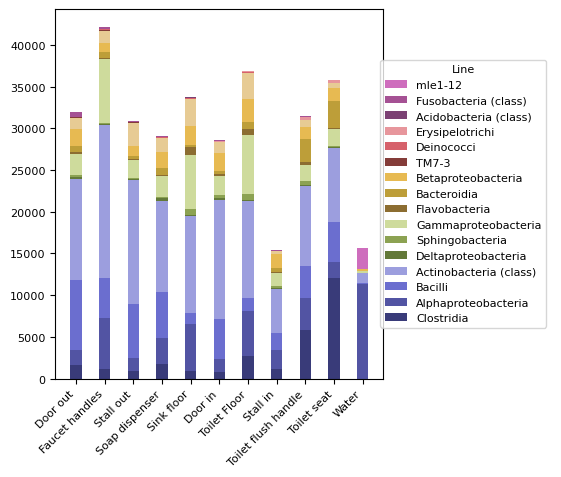

In [84]:
bottom = np.array([0.0 for i in range(11)])
cmap = matplotlib.cm.get_cmap('tab20b')
cnt = 0

# fig, ax = plt.subplots()
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios":[4, 1.5]})

for phyl in dict_phyl_high:
    ax.bar(labels_surf, dict_phyl_high[phyl], width=0.4, bottom=bottom, label=phyl, color=cmap(cnt))
    bottom += np.array(dict_phyl_high[phyl])
    cnt += 1/len(dict_phyl_high)

# ax.legend(list(dict_phyl_high.keys()))
handles, labels = ax.get_legend_handles_labels()
lax.legend(handles[::-1], labels[::-1], title='Line', loc=7)
lax.axis("off")

ax.set_xticks(labels_surf)
ax.set_xticklabels(labels_surf, rotation=45, ha='right')

[Text(0.0, 0, 'Door out'),
 Text(1.0, 0, 'Faucet handles'),
 Text(2.0, 0, 'Stall out'),
 Text(3.0, 0, 'Soap dispenser'),
 Text(4.0, 0, 'Sink floor'),
 Text(5.0, 0, 'Door in'),
 Text(6.0, 0, 'Toilet Floor'),
 Text(7.0, 0, 'Stall in'),
 Text(8.0, 0, 'Toilet flush handle'),
 Text(9.0, 0, 'Toilet seat'),
 Text(10.0, 0, 'Water')]

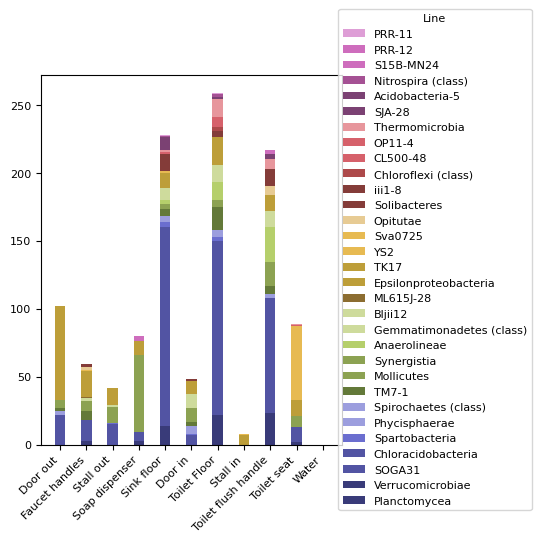

In [85]:
bottom = np.array([0.0 for i in range(11)])
cmap = matplotlib.cm.get_cmap('tab20b')
cnt = 0

# fig, ax = plt.subplots()
fig, (ax, lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios":[4, 2]})

for phyl in dict_phyl_low:
    ax.bar(labels_surf, dict_phyl_low[phyl], width=0.4, bottom=bottom, label=phyl, color=cmap(cnt))
    bottom += np.array(dict_phyl_low[phyl])
    cnt += 1/len(dict_phyl_low)

# ax.legend(list(dict_phyl_low.keys()))
handles, labels = ax.get_legend_handles_labels()
lax.legend(handles[::-1], labels[::-1], title='Line', loc=7)
lax.axis("off")

ax.set_xticks(labels_surf)
ax.set_xticklabels(labels_surf, rotation=45, ha='right')

## Heatmap

In [86]:
abundance = np.array(list(dict_phyl.values()))
phylums = list(dict_phyl.keys())

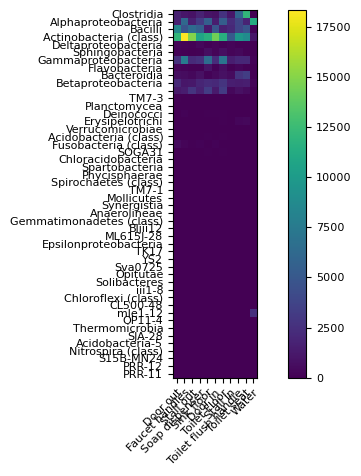

In [87]:
fig, ax = plt.subplots()
im = ax.imshow(abundance)

ax.set_xticks(np.arange(len(labels_surf)), labels=labels_surf)
ax.set_yticks(np.arange(len(phylums)), labels=phylums)

plt.rc('font', size=8)
# plt.rc('legend', fontsize=12)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.colorbar(im, ax = ax)
fig.tight_layout()